In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=7b82216097e0d9ff590e4196355ca40861c8310ea8a6979f98c73e6f739fb151
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [4]:
!pip install mlxtend

In [5]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

# 1 - Business Problem
**Prepare rules for the all the data sets 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values 2) Change the minimum length in apriori algorithm 3) Visulize the obtained rules using different plots**

# 2 - Data collection and description

In [25]:
df = pd.read_csv("book.csv")

In [27]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [28]:
df1 = df.copy()

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [30]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [31]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [32]:
df1.shape

(2000, 11)

In [34]:
item_sets = {}

In [36]:
te = TransactionEncoder()

In [37]:
te_ary = te.fit(df1).transform(df1)

In [38]:
ap = pd.DataFrame(te_ary, columns = te.columns_)

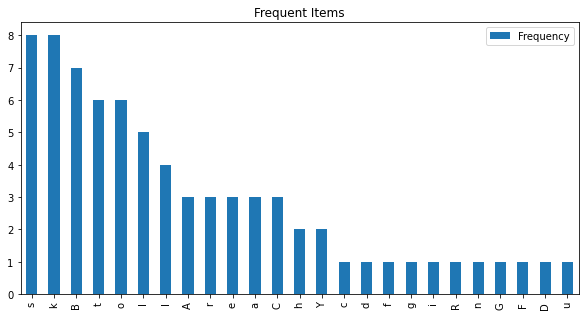

In [46]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(10,5),
                                                                                  title="Frequent Items")
plt.show()


# 3 - Apriori algorithm

In [47]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [48]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [49]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [50]:
confs = []

In [51]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result

In [52]:
all_conf = pd.concat(confs,axis=1)

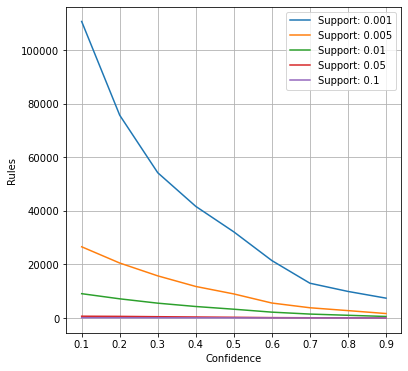

In [54]:
all_conf.plot(figsize=(6,6),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

# 4 - Conclusion
As shown in above graph

1.Lower the Confidence level Higher the no. of rules.
2.Higher the Support, lower the no. of rules.

# **Lets try with Support 0.01 and Confidence at 0.4**

In [55]:
ap_final =  apriori(ap,0.001,True)

In [56]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [57]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
6,(A),(r),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
...,...,...,...,...,...,...,...,...,...
741,"(t, B)","(k, o, Y, s)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970
742,"(Y, s)","(k, t, o, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
743,"(Y, o)","(k, t, s, B)",0.0010,0.0015,0.001,1.000000,666.666667,0.000999,inf
744,"(Y, B)","(k, t, s, o)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf


In [58]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

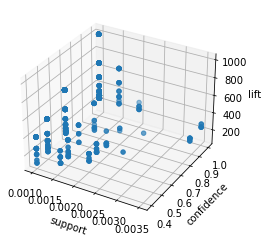

In [59]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

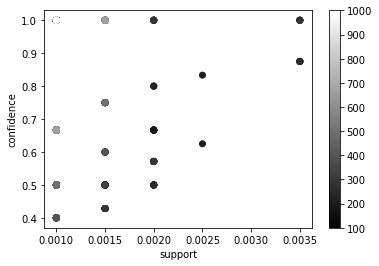

In [63]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")